In [1]:
import numpy as np
import os
import seaborn as sns
import scipy.stats as ss
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from __future__ import division

In [ ]:
mouseList = ['bv119', 'bv125', 'bv132', 'bv135', 'bv136', 'bv138', 'bv140', 'bv142', 'bv143','bv150', 'bv151', 'bv152', 'bv153', 'bv154', 'bv160', 'bv163', 'bv165', 'bv167', 'bv169', 'tg531', 'tg532', 'tg535']
df = pd.DataFrame()
for mouseID in mouseList:
    print(mouseID), 
    labels = pd.read_excel('/.../Immuno_results.xlsx', sheet_name=mouseID)
    df = pd.concat((df, labels[['Region', 'Layer', 'Subtype']]))

In [20]:
CA2 = len(df[df.Region == 'CA2'])
CA3 = len(df[df.Region == 'CA3'])
tot = CA2 + CA3

([<matplotlib.patches.Wedge at 0x7fc7aed65750>,
 [Text(-1.07957,0.211002,u''), Text(1.12864,-0.220593,u'')])

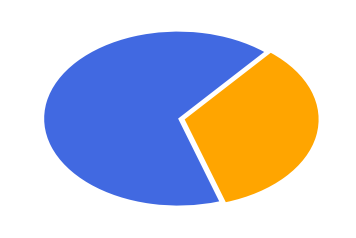

In [9]:
plt.pie([CA3/tot, CA2/tot], explode = [0, 0.05], colors = ['royalblue', 'orange'], startangle=50, shadow=0)

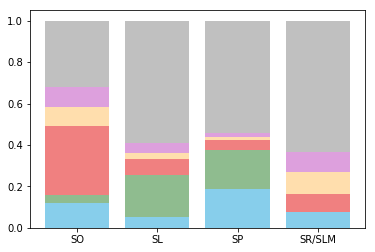

In [26]:
reg   = 'CA2' #also try 'CA3'
types = ['PVBC', 'AAC', 'SOM', 'CCK', 'CB', 'Nothing']
layers = ['SO', 'SL', 'SP', 'SR/SLM']
# tot = len(df[(df.Region == reg) & (df.Subtype.isin(types))])

for xi, layer in enumerate(layers):
    bottom = 0    
    tot = len(df[(df.Region == reg) & (df.Subtype.isin(types)) & (df.Layer == layer)])
    for typ, col in zip(types, ['skyblue', 'darkseagreen', 'lightcoral', 'navajowhite', 'plum', 'silver']):
        num = len(df[(df.Region == reg) & (df.Layer == layer) & (df.Subtype == typ)]) / tot
        plt.bar(xi, num, color=col, bottom=bottom, )
        bottom += num
plt.xticks(np.arange(xi+1), layers)